# Projet : Concevez une application au service de la santé publique

# 1. Nettoyage du jeu de données :

## Objectif :

- Comprendre du mieux possible nos données
- Réduire le dataset initial 

## Checklist de base 

## Analyse de Forme :

- variable target : nutrition-score-fr_100g
- lignes et colonnes : 1 532 370, 183
- types de variables : qualitatives : 58, quantitatives : 125
- Analyse des outlers : beaucoup d'outliers sont présents dans nos variables
- Analyse des valeurs manquantes :
      - beaucoup de NaN (moitié des variables > 90% de NaN)
      - 2 groupes de données (<33%),(>90%) / Target (77%)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_row', 300000)
pd.set_option('display.max_column', 183)

In [3]:
data = pd.read_csv(r"C:\Users\SAMSUNG\Desktop\OpenClassrooms\P3_OC\P3_Données\en.openfoodfacts.org.products.csv", sep = "\\t", error_bad_lines = False,nrows=300000,encoding='UTF-8', engine = 'python')

# 1.1. Analyse de la forme des données :

In [4]:
data.shape

(300000, 183)

In [5]:
df = data.copy()

In [6]:
df = df[df['countries_en'].isin(['France'])] # on filtre countries sur France
df.shape

(50028, 183)

In [7]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,375.0,1569.0,NaN,7.0,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.1,15.0,

In [8]:
df.dtypes.value_counts()

float64    123
object      58
int64        2
dtype: int64

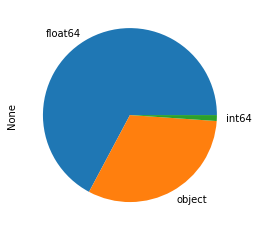

In [9]:
df.dtypes.value_counts().plot.pie()

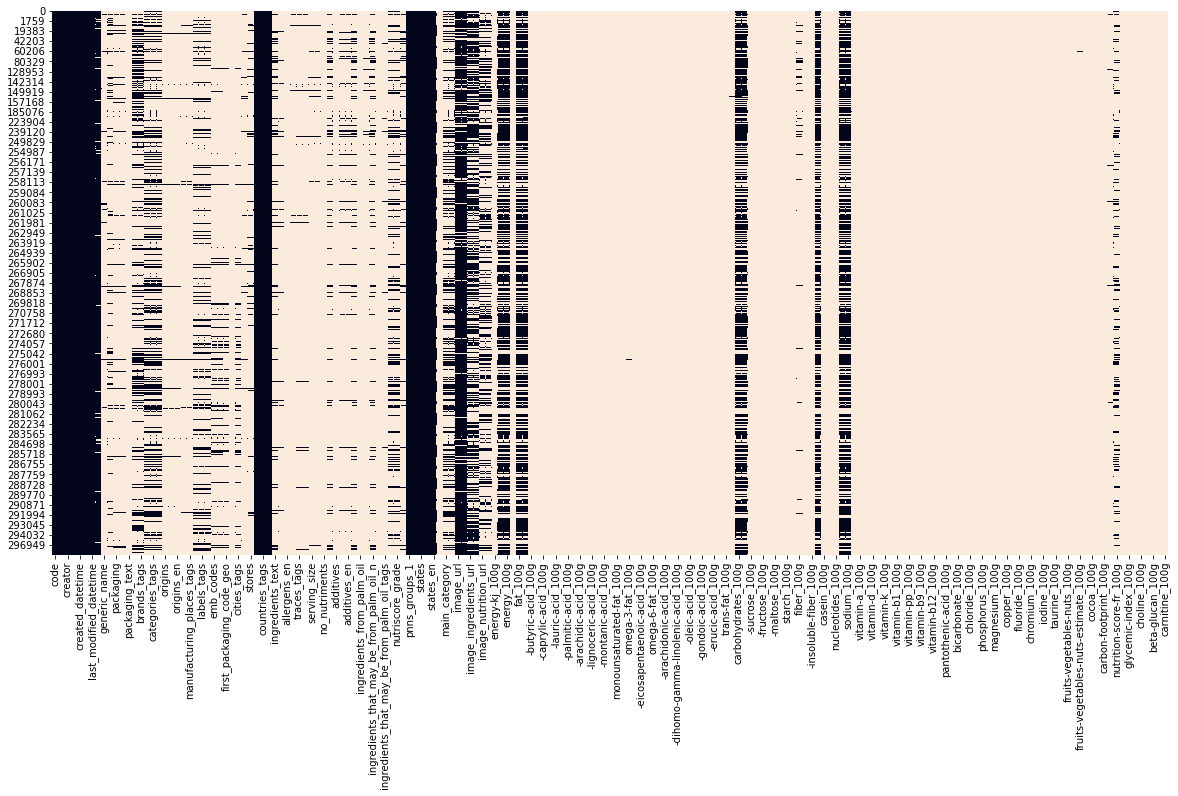

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [11]:
for col in ['code','url','product_name']:
    print(df[df.duplicated([col])].shape)

(0, 183)
(0, 183)
(19473, 183)


In [12]:
df[df.duplicated(['code','product_name'])].shape

(0, 183)

In [13]:
df[df.duplicated(['url','product_name'])].shape

(0, 183)

In [14]:
df = df.drop_duplicates(subset="url")

In [15]:
df.shape

(50028, 183)

In [17]:
df = df[['nutrition-score-fr_100g', 'energy-kcal_100g', 'saturated-fat_100g', 'sugars_100g', 
         'sodium_100g', 'fiber_100g', 'proteins_100g', 'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-dried_100g']]

In [18]:
df.shape

(50028, 9)

# 1.2. Visulation initiale - Elimination des colonnes inutiles

In [19]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

sodium_100g                          0.324458
saturated-fat_100g                   0.326037
proteins_100g                        0.326077
energy-kcal_100g                     0.326237
sugars_100g                          0.327856
nutrition-score-fr_100g              0.771948
fiber_100g                           0.946510
fruits-vegetables-nuts_100g          0.999460
fruits-vegetables-nuts-dried_100g    0.999880
dtype: float64

In [20]:
df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
df.head()

,nutrition-score-fr_100g,energy-kcal_100g,saturated-fat_100g,sugars_100g,sodium_100g,proteins_100g
0,NaN,375.0,3.08,15.0,0.560,7.8
1,NaN,NaN,NaN,NaN,NaN,NaN
3,18.0,NaN,2.20,22.0,1.840,5.1
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,21.0,0.00,0.4,0.816,0.2


In [21]:
df.shape

(50028, 6)

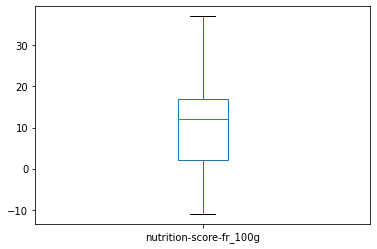

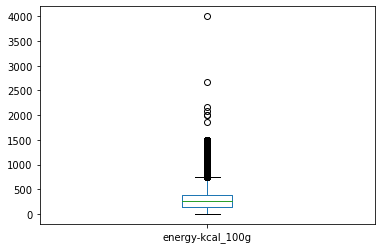

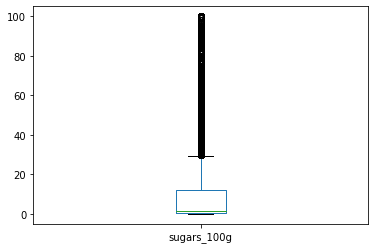

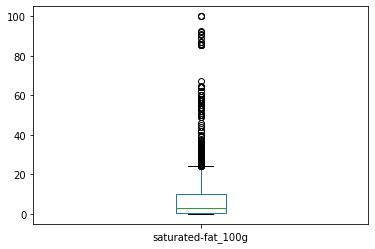

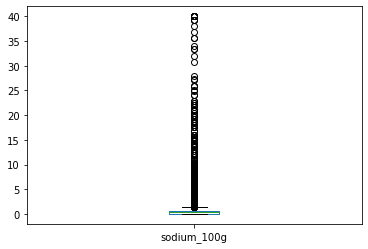

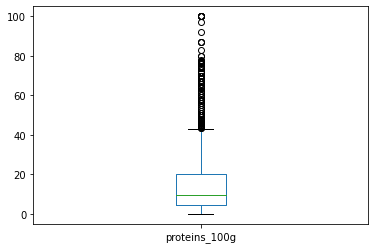

In [22]:
for col in df[['nutrition-score-fr_100g','energy-kcal_100g', 'sugars_100g', 'saturated-fat_100g', 'sodium_100g', 'proteins_100g']]:
    plt.figure()
    df[col].plot(kind='box')

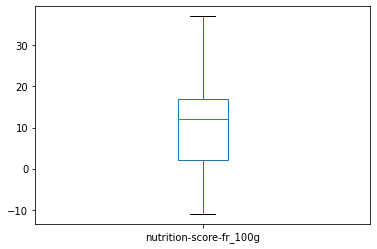

In [23]:
Q3 = df['nutrition-score-fr_100g'].quantile(0.75)
Q1 = df['nutrition-score-fr_100g'].quantile(0.25)
IQR = Q3 - Q1
filter=(df['nutrition-score-fr_100g']>=Q1 - 1.5 * IQR) & (df['nutrition-score-fr_100g']<= Q3 + 1.5 * IQR)
df1=df['nutrition-score-fr_100g'].loc[filter]
df1.plot(kind='box')

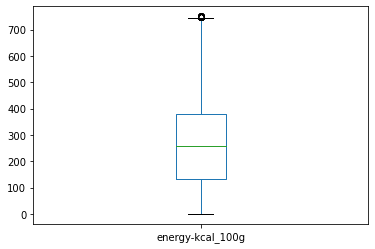

In [24]:
Q3 = df['energy-kcal_100g'].quantile(0.75)
Q1 = df['energy-kcal_100g'].quantile(0.25)
IQR = Q3 - Q1
filter=(df['energy-kcal_100g']>=Q1 - 1.5 * IQR) & (df['energy-kcal_100g']<= Q3 + 1.5 * IQR)
df2=df['energy-kcal_100g'].loc[filter]
df2.plot(kind='box')

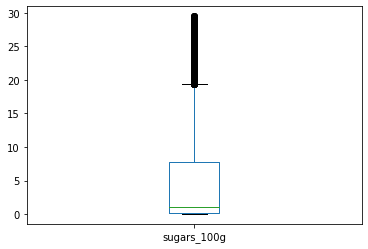

In [25]:
Q3 = df['sugars_100g'].quantile(0.75)
Q1 = df['sugars_100g'].quantile(0.25)
IQR = Q3 - Q1
filter=(df['sugars_100g']>=Q1 - 1.5 * IQR) & (df['sugars_100g']<= Q3 + 1.5 * IQR)
df3=df['sugars_100g'].loc[filter]
df3.plot(kind='box')

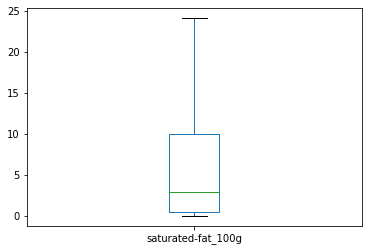

In [26]:
Q3 = df['saturated-fat_100g'].quantile(0.75)
Q1 = df['saturated-fat_100g'].quantile(0.25)
IQR = Q3 - Q1
filter=(df['saturated-fat_100g']>=Q1 - 1.5 * IQR) & (df['saturated-fat_100g']<= Q3 + 1.5 * IQR)
df4=df['saturated-fat_100g'].loc[filter]
df4.plot(kind='box')

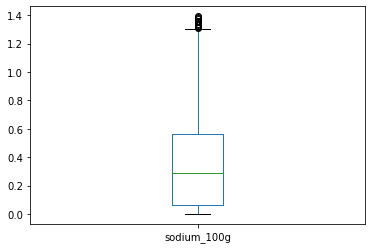

In [27]:
Q3 = df['sodium_100g'].quantile(0.75)
Q1 = df['sodium_100g'].quantile(0.25)
IQR = Q3 - Q1
filter=(df['sodium_100g']>=Q1 - 1.5 * IQR) & (df['sodium_100g']<= Q3 + 1.5 * IQR)
df5=df['sodium_100g'].loc[filter]
df5.plot(kind='box')

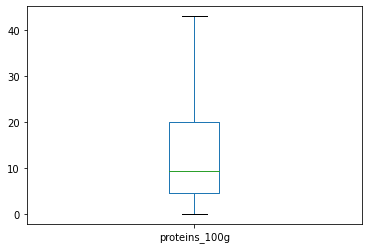

In [28]:
Q3 = df['proteins_100g'].quantile(0.75)
Q1 = df['proteins_100g'].quantile(0.25)
IQR = Q3 - Q1
filter=(df['proteins_100g']>=Q1 - 1.5 * IQR) & (df['proteins_100g']<= Q3 + 1.5 * IQR)
df6=df['proteins_100g'].loc[filter]
df6.plot(kind='box')

In [29]:
df = pd.concat([df1, df2, df3, df4, df5, df6], axis=1, sort=False)
df.head()

,nutrition-score-fr_100g,energy-kcal_100g,sugars_100g,saturated-fat_100g,sodium_100g,proteins_100g
0,NaN,375.0,15.0,3.08,0.560,7.8
3,18.0,NaN,22.0,2.20,NaN,5.1
5,NaN,21.0,0.4,0.00,0.816,0.2
6,NaN,60.0,3.0,1.00,0.460,2.0
11,NaN,NaN,NaN,NaN,0.000,NaN


In [30]:
df.shape

(34796, 6)

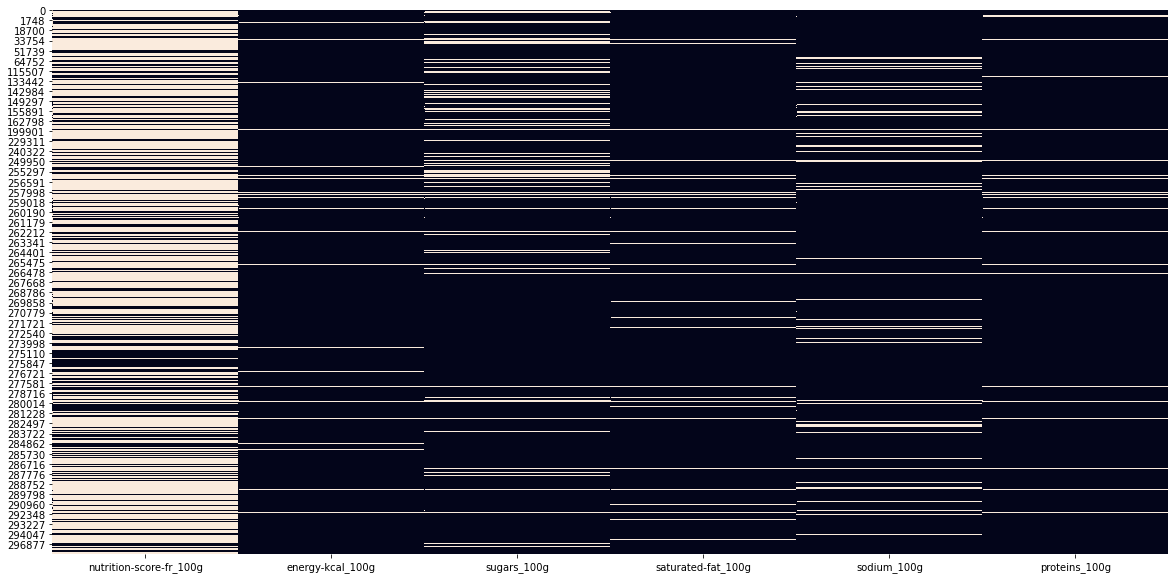

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [32]:
df.to_csv(r"C:\Users\SAMSUNG\Desktop\OpenClassrooms\P3_OC\P3_Données\en.openfoodfacts.org.products.reduitna.csv")

In [33]:
df = df.dropna()
df.head()

,nutrition-score-fr_100g,energy-kcal_100g,sugars_100g,saturated-fat_100g,sodium_100g,proteins_100g
13,1.0,32.0,3.9,0.1,0.168,0.9
21,14.0,381.0,21.9,15.5,0.040,4.6
31,-2.0,157.0,27.0,0.0,0.000,0.6
35,1.0,143.0,1.0,1.0,0.108,1.9
60,14.0,397.0,0.1,21.6,0.520,25.0


In [34]:
df.shape

(9584, 6)

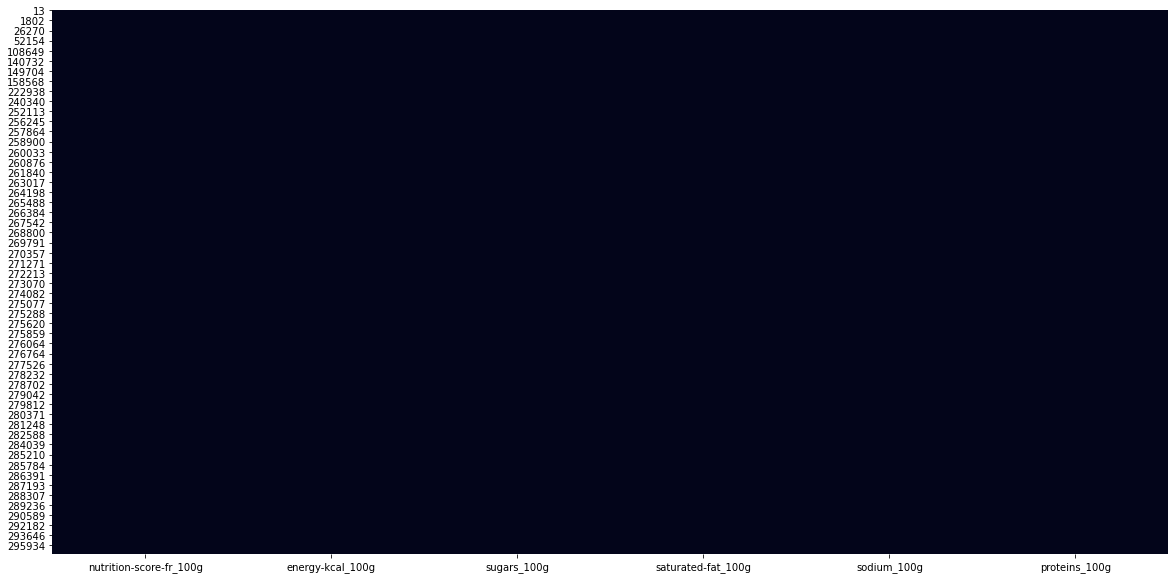

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [36]:
df.to_csv(r"C:\Users\SAMSUNG\Desktop\OpenClassrooms\P3_OC\P3_Données\en.openfoodfacts.org.products.reduit.csv") 